In [1]:
%load_ext autoreload
%autoreload 2

This is an example for Na I D equivalent width (EW) estimation.

In [7]:
import sys
sys.path.append('..')
sys.path.append('../tools/')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import pymc as pm
import arviz as az
import numpy as np

# read spec data
z = 0.0307
spec = '../../SN2020jgb/spectroscopy/SN2020jgb/ZTF20aayhacx_20200623_Keck1_v1.ascii'
Spec = SpectrumSN_Lines(spec, 0)

# Na I D

<AxesSubplot:>

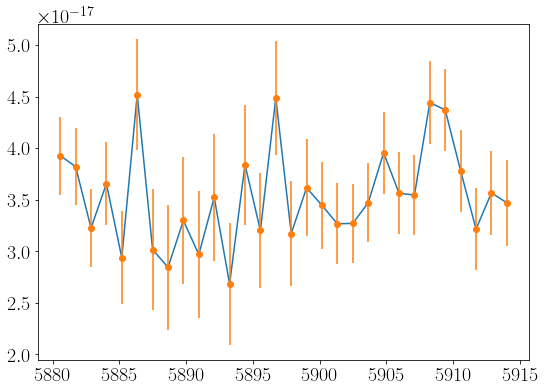

In [8]:
Spec.plot_line_region(5880, 5915)

In [9]:
Spec.add_line('NaI_D', 5880, 5910, lines=[
              [5889.950, 5895.924]], rel_strength=[[2, 1]])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_var, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 18 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


              mean       sd  hdi_16%  hdi_84%  mcse_mean  mcse_sd  ess_bulk  \
v_mean[0]   15.780  161.973 -136.094  167.512      5.222    3.694   974.628   
v_sig[0]   113.502   56.317   83.569  199.990      1.923    1.360   631.425   
A[0]       -22.652   15.538  -28.357   -0.405      0.434    0.307  1147.236   
sigma_0      0.046    0.032    0.001    0.059      0.001    0.001  1072.305   
EW_0         1.161    0.796    0.021    1.453      0.022    0.016  1147.236   

           ess_tail  r_hat  
v_mean[0]   419.833  1.005  
v_sig[0]    209.531  1.003  
A[0]       1262.741  1.001  
sigma_0     957.193  1.000  
EW_0       1262.741  1.001  


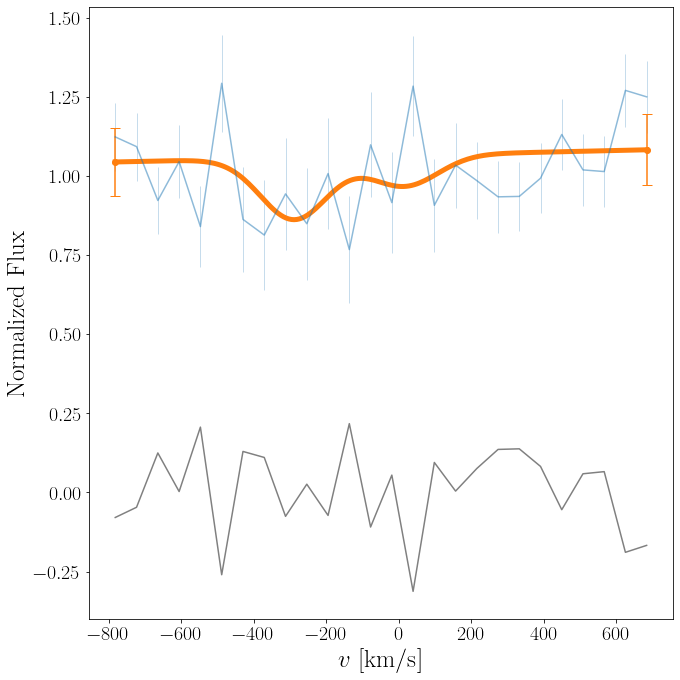

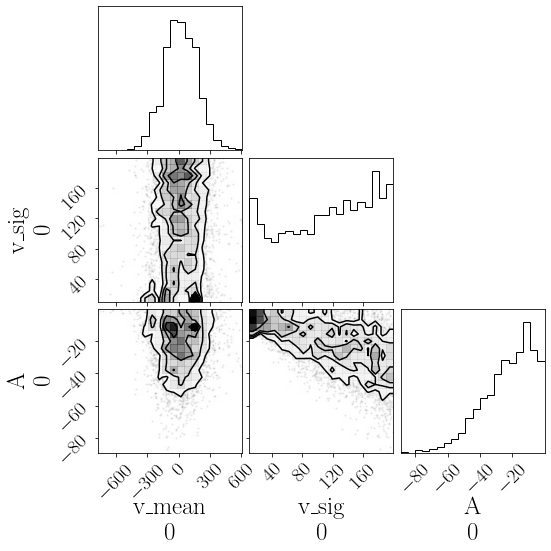

In [10]:
trace_NaI, Model_NaI = Spec.line['NaI_D'].MCMC_NUTS_sampler(
    vel_mean_mu=[0], vel_mean_sig=[2e2], #typical velocity dispersion <= 200 km/s
    vel_var_lim=[1e2, 4e4],
    A_lim=[-1e2, 0],
    nburn=2000,
    target_accept=0.95,
    initial=[1, 1, 0, 8, -30], Plot_mcmc=True)


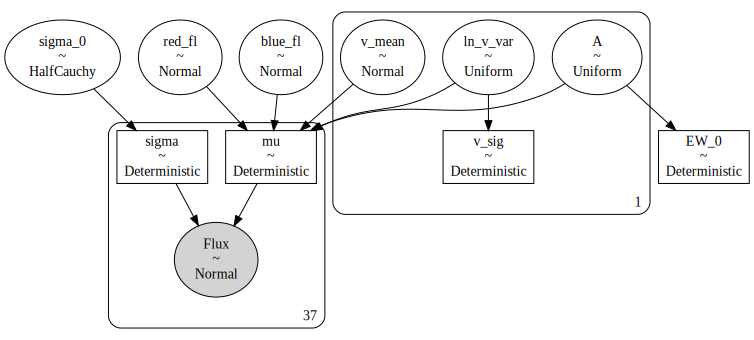

In [6]:
pm.model_to_graphviz(Model_NaI)